## Carga y limpieza de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cargar datos

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('../data/chatbot_satisfaction_dataset_utf8.csv')

# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(30000, 14)


,id_estudiante,fecha_consulta,derivado,tipo_consulta,urgencia,tiempo_consulta,tiempo_espera,id_asesor,calidad_del_servicio,consulta_resuelta,satisfaccion_estudiante,indice_promotor_neto,puntaje_esfuerzo_cliente,mes_consulta
0,E00001,2024-09-20,True,Solicitud de documentos,Media,2436,1159,A215,1,False,5,-2,3,septiembre
1,E00002,2023-02-07,False,Información general,Baja,2699,1163,A192,3,True,5,19,4,febrero
2,E00003,2024-10-04,True,Información general,Media,1062,434,A242,2,False,4,48,2,octubre
3,E00004,2023-10-24,True,Solicitud de documentos,Baja,663,620,A007,3,True,2,88,3,octubre
4,E00005,2024-12-31,True,Solicitud de documentos,Baja,2376,164,A259,1,True,4,23,4,diciembre


In [3]:
# Eliminamos Id, ya que es solo un numero para identificar cada estudiante
data.drop('id_estudiante', axis=1, inplace=True)

data.shape

(30000, 13)

In [4]:
data.dtypes

fecha_consulta              object
derivado                      bool
tipo_consulta               object
urgencia                    object
tiempo_consulta              int64
tiempo_espera                int64
id_asesor                   object
calidad_del_servicio         int64
consulta_resuelta             bool
satisfaccion_estudiante      int64
indice_promotor_neto         int64
puntaje_esfuerzo_cliente     int64
mes_consulta                object
dtype: object

Como no se visualizan valores nulos ni duplicados, no es necesario aplicar una limpieza de datos

## Transformación y codificación de variables
Podemos observar que hay variables como **derivado** que son booleanas y estan etiquetadas como True y False convirtiendolas a categóricas, para que nuestro modelo trabaje de mejor forma esta variable y otras como **urgencia** que es categorica, la vamos a transformar en numéricas, con diferentes métodos de Encoding

In [5]:
# Codificaciones
# Booleanas
data['derivado'] = data['derivado'].astype(int)
data['consulta_resuelta'] = data['consulta_resuelta'].astype(int)

# Categóricas ordinales
urgencia_map = {'Baja': 0, 'Media': 1, 'Alta': 2}
data['urgencia'] = data['urgencia'].map(urgencia_map)

# visualise the dataset
data.head()


,fecha_consulta,derivado,tipo_consulta,urgencia,tiempo_consulta,tiempo_espera,id_asesor,calidad_del_servicio,consulta_resuelta,satisfaccion_estudiante,indice_promotor_neto,puntaje_esfuerzo_cliente,mes_consulta
0,2024-09-20,1,Solicitud de documentos,1,2436,1159,A215,1,0,5,-2,3,septiembre
1,2023-02-07,0,Información general,0,2699,1163,A192,3,1,5,19,4,febrero
2,2024-10-04,1,Información general,1,1062,434,A242,2,0,4,48,2,octubre
3,2023-10-24,1,Solicitud de documentos,0,663,620,A007,3,1,2,88,3,octubre
4,2024-12-31,1,Solicitud de documentos,0,2376,164,A259,1,1,4,23,4,diciembre


## Identificación de Variable Target

La variable **satisfaccion_estudiante** representa el nivel de satisfacción que un estudiante expresa tras interactuar con el servicio brindado por el chatbot o por un asesor. Esta métrica es clave para evaluar la efectividad del servicio, la calidad del soporte, y la percepción general del usuario.

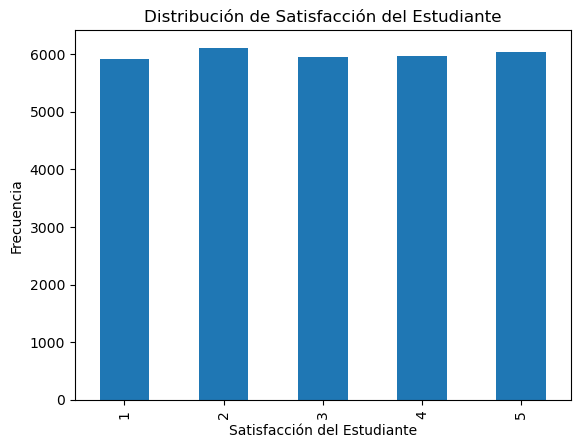

In [7]:
data['satisfaccion_estudiante'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Satisfacción del Estudiante')
plt.ylabel('Frecuencia')
plt.title('Distribución de Satisfacción del Estudiante')
plt.show()

Se puede observar que los datos de satisfacción se concentran en valores enteros, con una distribuccion aparentemente uniforme, con una ligera predisposicion hacia el 2.

## Tipos de Variables
A continuación, identificamos las variables categóricas y numéricas

In [8]:
# identifiquemos las variables categóricas
# capturaremos aquellas de tipo *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']


# agreguemos MSSubClass a la lista de variables categóricas
len(cat_vars)

4

In [9]:
# Convertir todas las variables categoricas a tipo object
data[cat_vars] = data[cat_vars].astype('O')

In [11]:
# identifiquemos las variables numéricas
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'revenue'
]

len(num_vars)


9

## Analisis Univariado
### Variables Numéricas

In [13]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  9


,derivado,urgencia,tiempo_consulta,tiempo_espera,calidad_del_servicio,consulta_resuelta,satisfaccion_estudiante,indice_promotor_neto,puntaje_esfuerzo_cliente
0,1,1,2436,1159,1,0,5,-2,3
1,0,0,2699,1163,3,1,5,19,4
2,1,1,1062,434,2,0,4,48,2
3,1,0,663,620,3,1,2,88,3
4,1,0,2376,164,1,1,4,23,4



📊 Variable Numérica: urgencia


count    30000.000000
mean         0.889967
std          0.701576
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: urgencia, dtype: float64

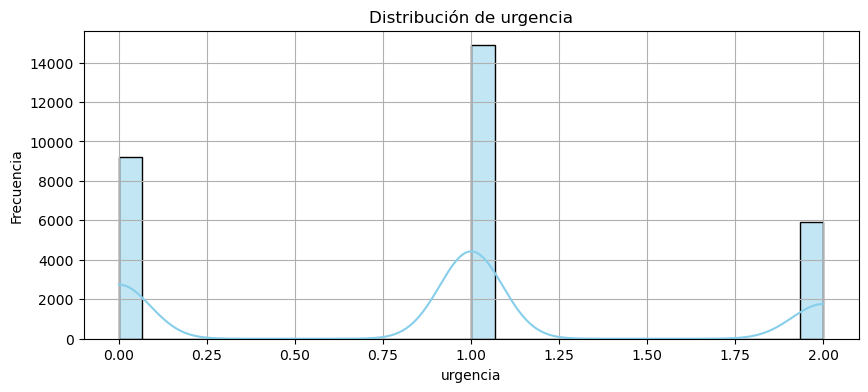

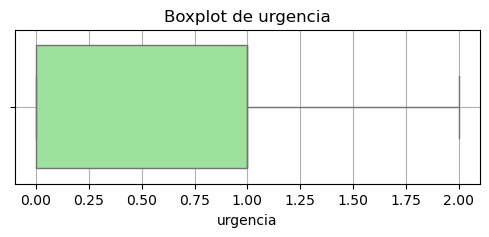


📊 Variable Numérica: tiempo_consulta


count    30000.000000
mean      1809.788367
std       1031.050185
min         30.000000
25%        914.000000
50%       1807.000000
75%       2701.000000
max       3599.000000
Name: tiempo_consulta, dtype: float64

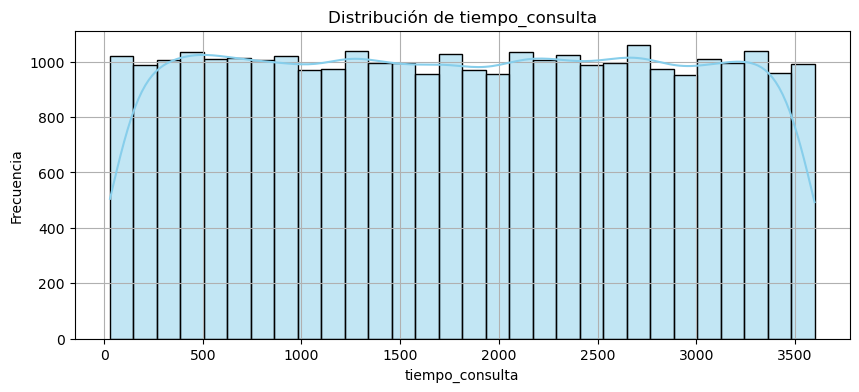

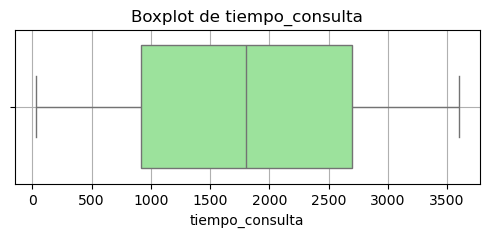


📊 Variable Numérica: tiempo_espera


count    30000.000000
mean       539.639233
std        335.070400
min          5.000000
25%        250.000000
50%        508.000000
75%        814.000000
max       1199.000000
Name: tiempo_espera, dtype: float64

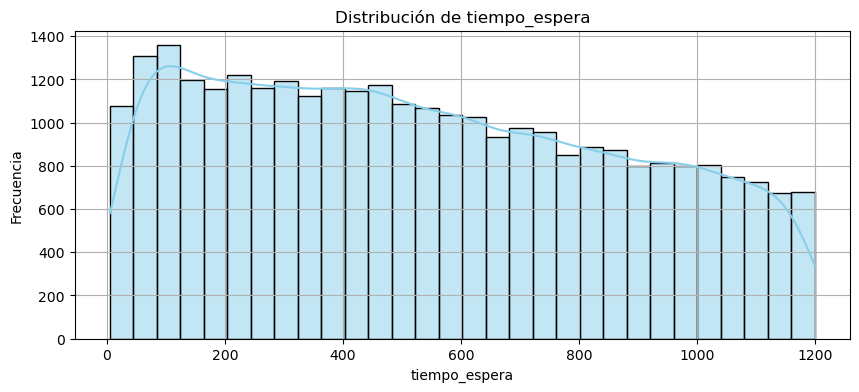

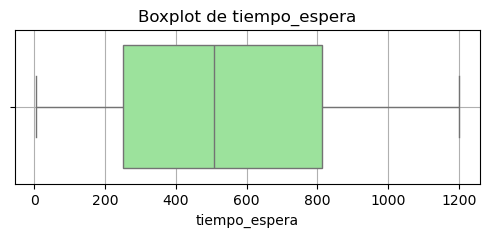


📊 Variable Numérica: calidad_del_servicio


count    30000.000000
mean         2.000400
std          0.817163
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: calidad_del_servicio, dtype: float64

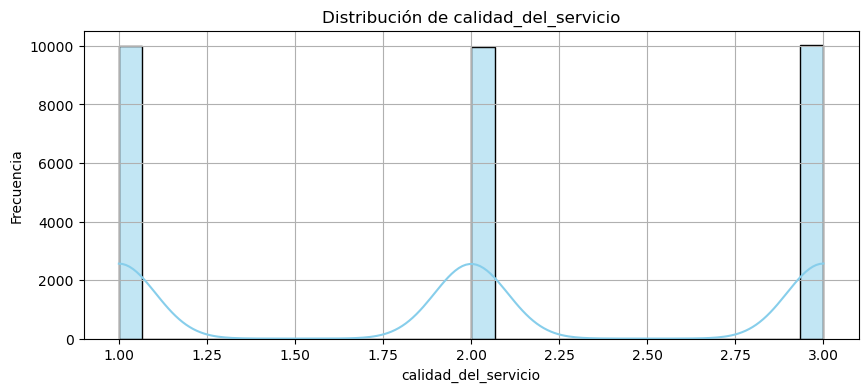

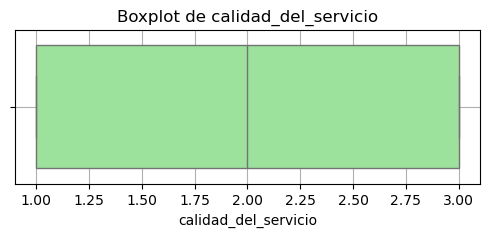


📊 Variable Numérica: satisfaccion_estudiante


count    30000.000000
mean         3.003667
std          1.413832
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: satisfaccion_estudiante, dtype: float64

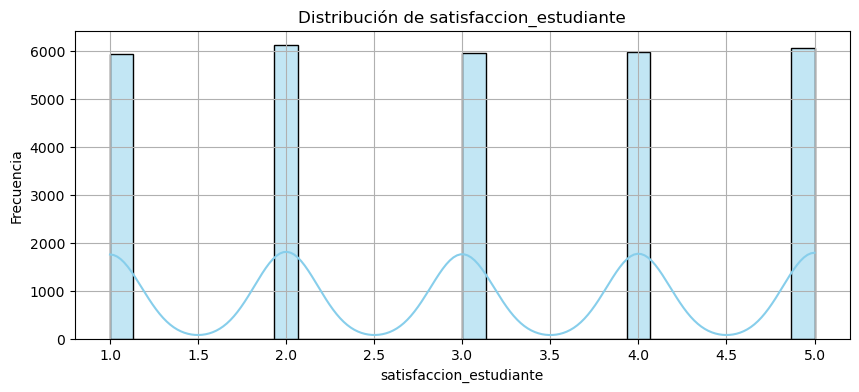

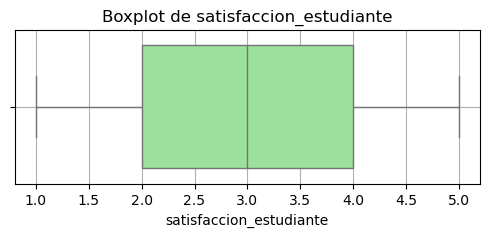


📊 Variable Numérica: indice_promotor_neto


count    30000.000000
mean         0.314633
std         57.684486
min       -100.000000
25%        -49.000000
50%          1.000000
75%         50.000000
max        100.000000
Name: indice_promotor_neto, dtype: float64

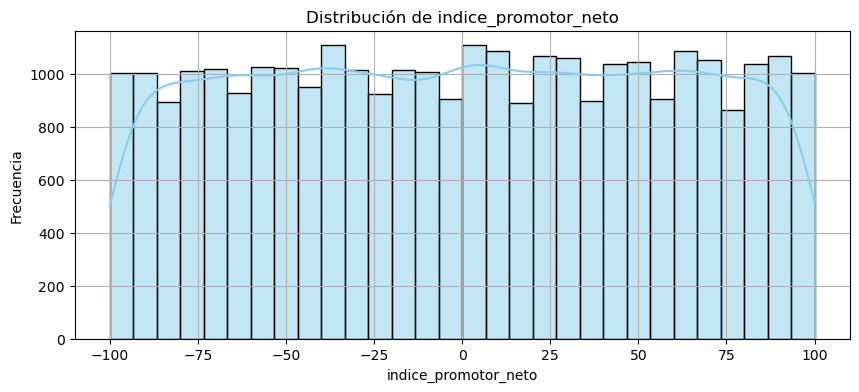

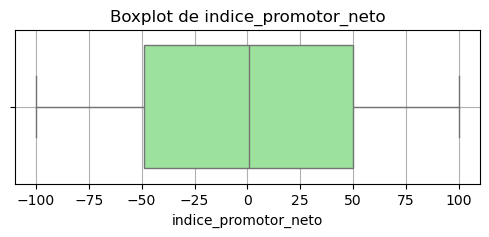


📊 Variable Numérica: puntaje_esfuerzo_cliente


count    30000.000000
mean         3.002500
std          1.417072
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: puntaje_esfuerzo_cliente, dtype: float64

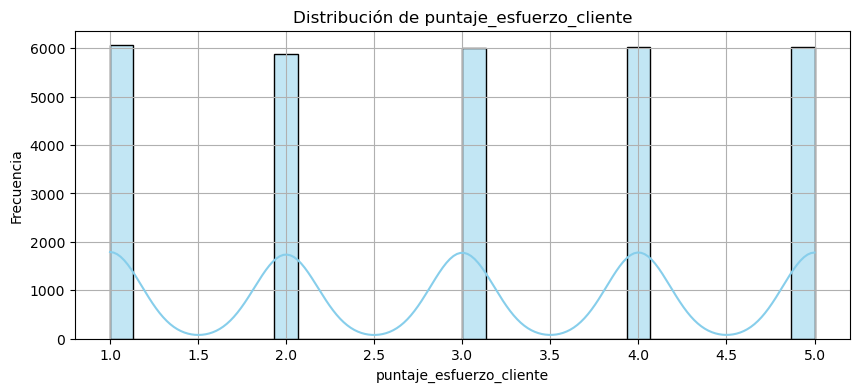

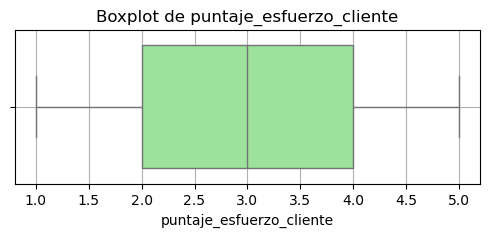


📊 Variable Booleana: derivado


count    30000.000000
mean         0.499433
std          0.500008
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: derivado, dtype: float64

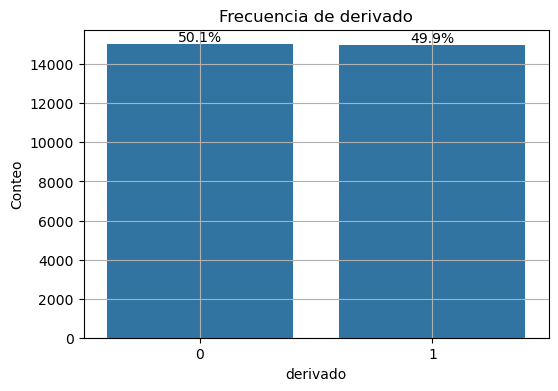


📊 Variable Booleana: consulta_resuelta


count    30000.000000
mean         0.800767
std          0.399431
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: consulta_resuelta, dtype: float64

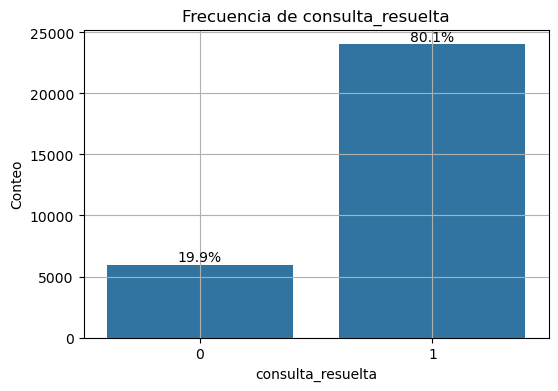

In [15]:
# Identificar booleanas y numéricas
bool_vars = ['derivado', 'consulta_resuelta']
numeric_vars = [var for var in num_vars if var not in bool_vars]

# Análisis para variables numéricas (excluyendo las booleanas)
for var in numeric_vars:
    print(f'\n📊 Variable Numérica: {var}')
    display(data[var].describe())

    plt.figure(figsize=(10, 4))
    sns.histplot(data[var], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()

# Análisis para variables booleanas
for var in bool_vars:
    print(f'\n📊 Variable Booleana: {var}')
    display(data[var].describe())

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var, data=data)
    
    # Mostrar etiquetas con porcentajes sobre las barras
    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percent = f'{100 * count / total:.1f}%'
        ax.annotate(percent, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.grid(True)
    plt.show()


### Variables Categóricas

In [16]:
print('Number of categorical variables: ', len(cat_vars))

# visualise the numerical variables
data[cat_vars].head()

Number of categorical variables:  4


,fecha_consulta,tipo_consulta,id_asesor,mes_consulta
0,2024-09-20,Solicitud de documentos,A215,septiembre
1,2023-02-07,Información general,A192,febrero
2,2024-10-04,Información general,A242,octubre
3,2023-10-24,Solicitud de documentos,A007,octubre
4,2024-12-31,Solicitud de documentos,A259,diciembre



📋 Variable Categórica: fecha_consulta


fecha_consulta
2023-08-14    62
2024-04-21    62
2024-09-15    57
2024-12-22    57
2023-04-16    56
              ..
2024-03-09    26
2024-08-26    25
2023-10-27    25
2024-09-13    25
2023-06-29    24
Name: count, Length: 731, dtype: int64

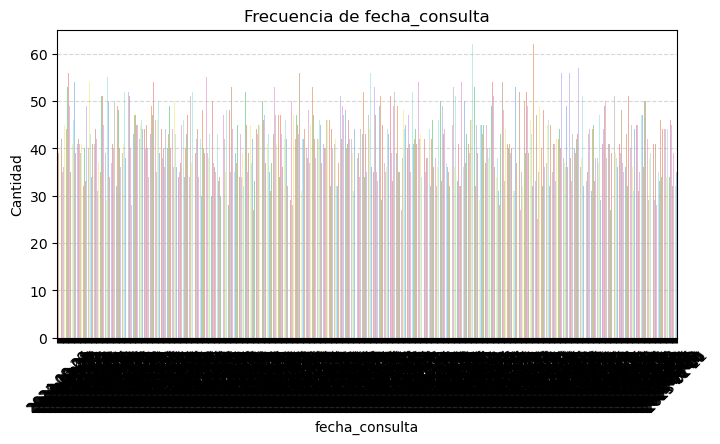


📋 Variable Categórica: tipo_consulta


tipo_consulta
Solicitud de documentos    6126
Información general        6050
Consulta de trámites       6020
Queja                      5913
Consulta de matrícula      5891
Name: count, dtype: int64

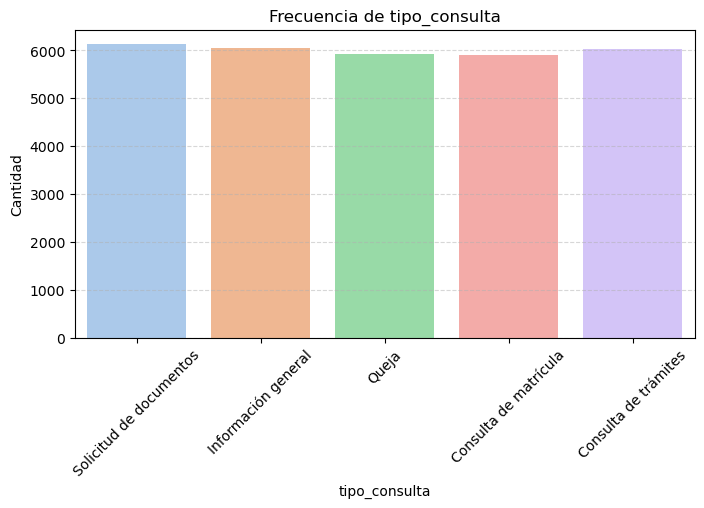


📋 Variable Categórica: id_asesor


id_asesor
A191    86
A390    80
A208    79
A267    78
A020    78
        ..
A179    44
A071    44
A039    42
A316    42
A340    42
Name: count, Length: 500, dtype: int64

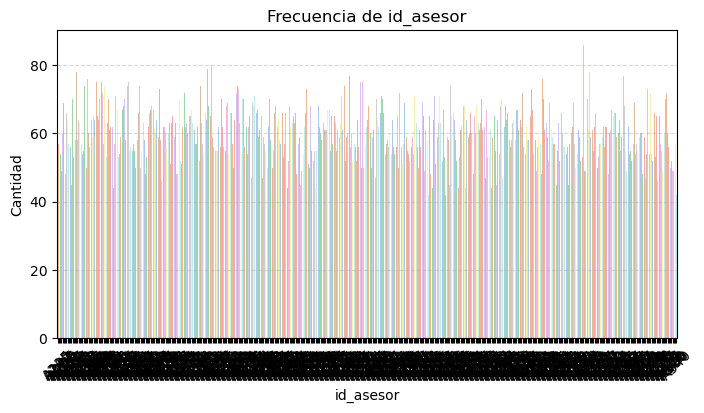


📋 Variable Categórica: mes_consulta


mes_consulta
diciembre     2655
julio         2595
marzo         2536
mayo          2532
abril         2509
agosto        2500
enero         2475
octubre       2473
noviembre     2465
septiembre    2463
junio         2451
febrero       2346
Name: count, dtype: int64

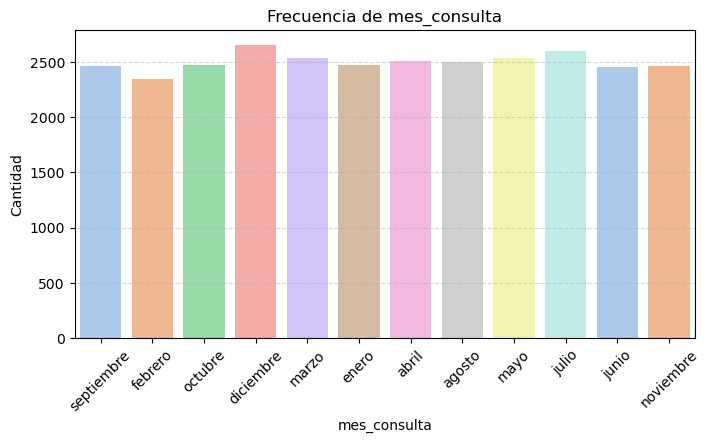

In [17]:
# Análisis univariado para variables categóricas
for var in cat_vars:
    print(f'\n📋 Variable Categórica: {var}')
    display(data[var].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue=var, data=data, palette='pastel', legend=False)
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Analisis Bivariado

## Variables discretas
Vamos a identificar las variables discretas, es decir, que muestran un numero finito de valores

In [15]:
# hagamos una lista de variables discretas
discrete_vars = [var for var in num_vars 
                 if len(data[var].unique()) < 20 and var != 'satisfaccion_estudiante']



print('Numero de Variables Discretas: ', len(discrete_vars))

Numero de Variables Discretas:  5


In [16]:
# Visualizamos las Variables Discretas

data[discrete_vars].head()

,derivado,urgencia,calidad_del_servicio,consulta_resuelta,puntaje_esfuerzo_cliente
0,1,1,1,0,3
1,0,0,3,1,4
2,1,1,2,0,2
3,1,0,3,1,3
4,1,0,1,1,4


Estas variables discretas tienden a ser calificaciones o escalas de evaluación.

Vamos a analizar su contribución a la satisfaccion del estudiante.

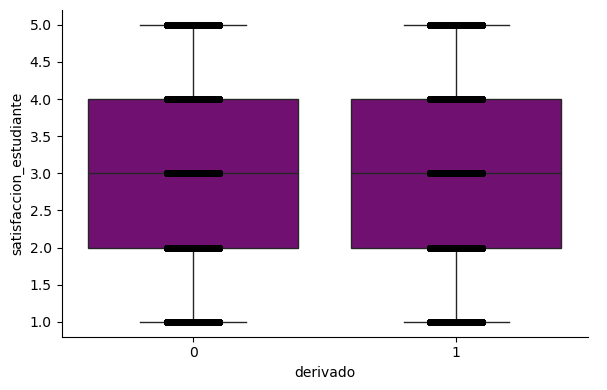

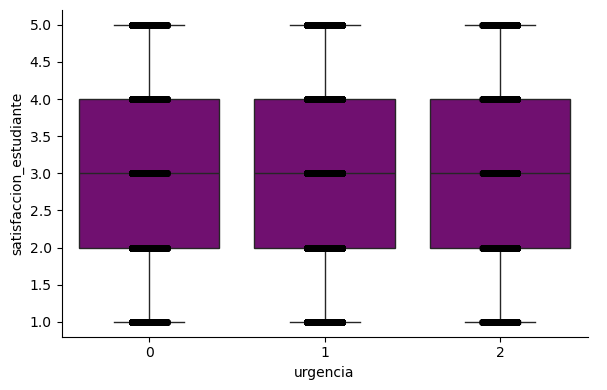

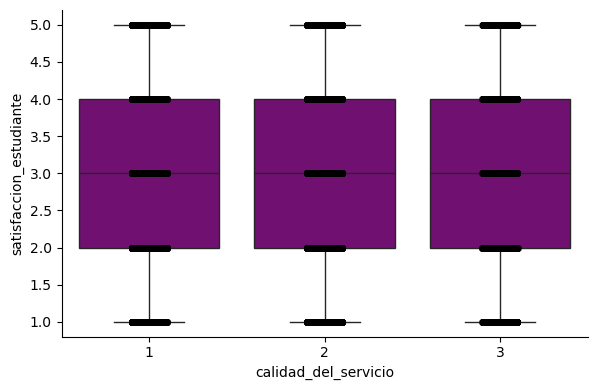

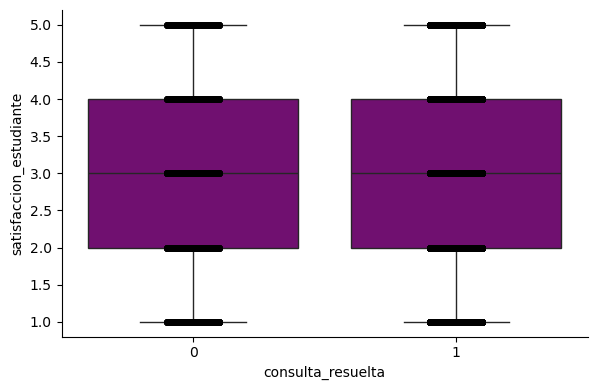

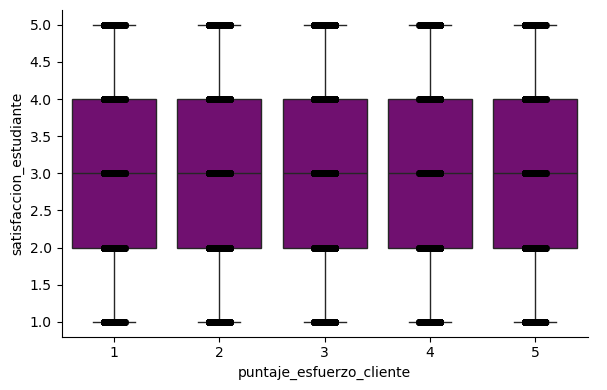

In [17]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='satisfaccion_estudiante', data=data, kind="box", height=4, aspect=1.5, color='purple')
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='satisfaccion_estudiante', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

## Tipos de Variables
A continuación, identificamos las variables categóricas y numéricas

In [18]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['tipo_consulta', 'id_asesor', 'mes_consulta']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [19]:
# Codificaciones
# Booleanas
data['derivado'] = data['derivado'].astype(int)
data['consulta_resuelta'] = data['consulta_resuelta'].astype(int)

# Categóricas ordinales
urgencia_map = {'Baja': 0, 'Media': 1, 'Alta': 2}
data['urgencia'] = data['urgencia'].map(urgencia_map)


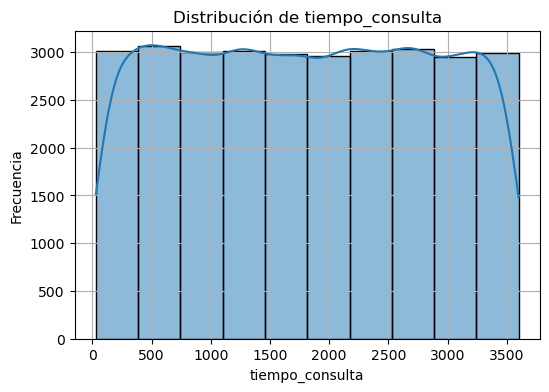

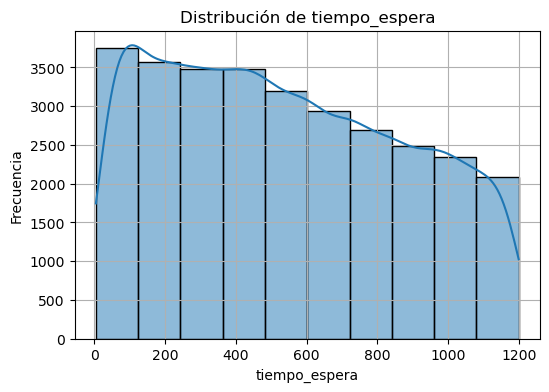

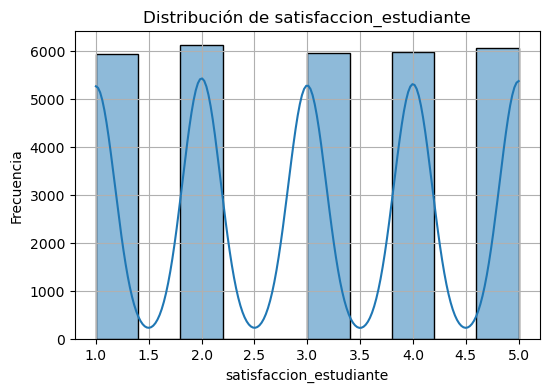

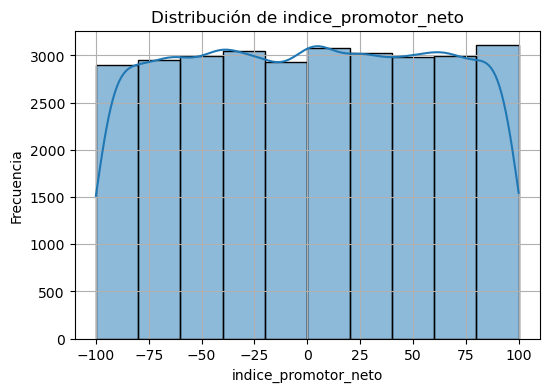

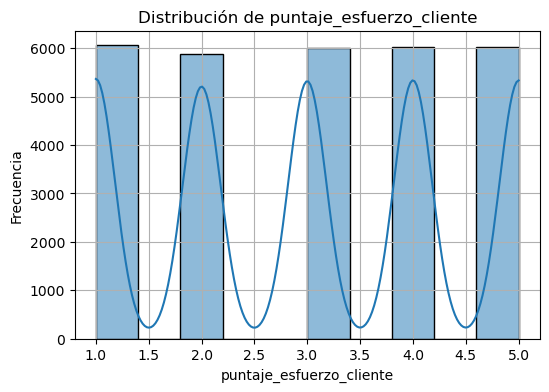

In [20]:
# Gráficos para variables numéricas
numericas = ['tiempo_consulta', 'tiempo_espera', 'satisfaccion_estudiante',
             'indice_promotor_neto', 'puntaje_esfuerzo_cliente']

for col in numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=10)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

## Variables Categóricas

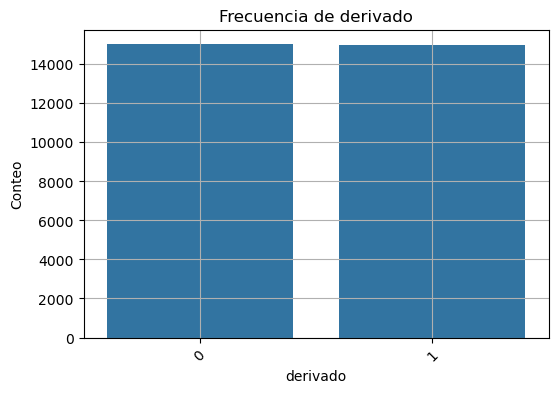

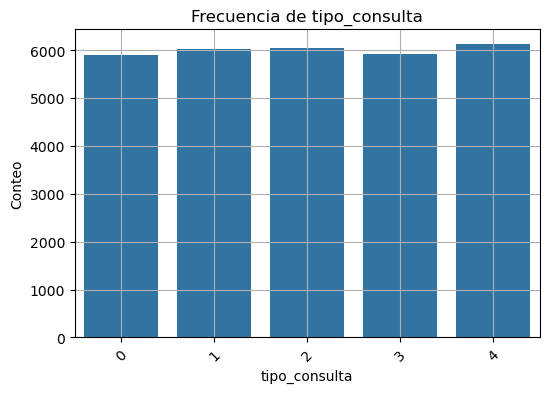

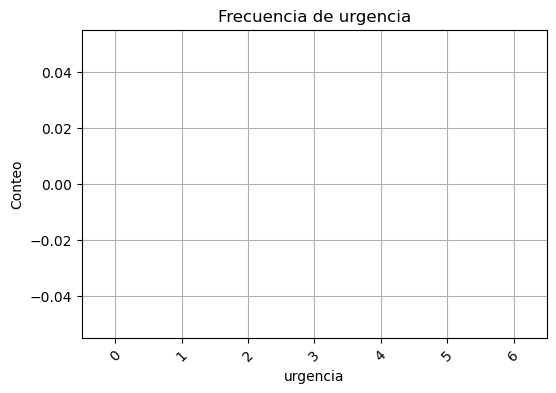

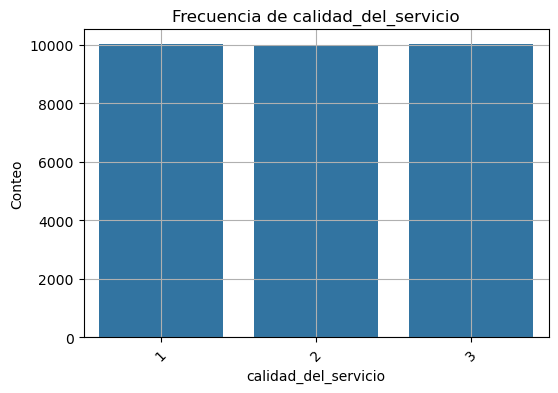

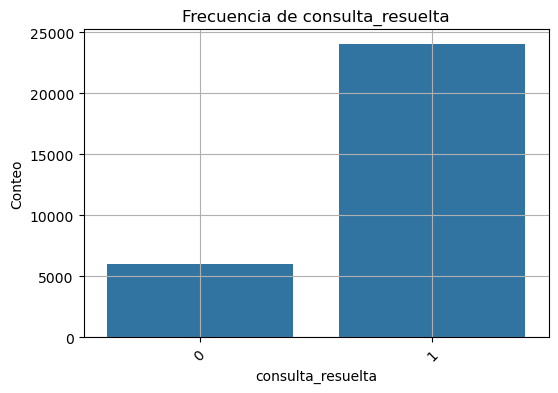

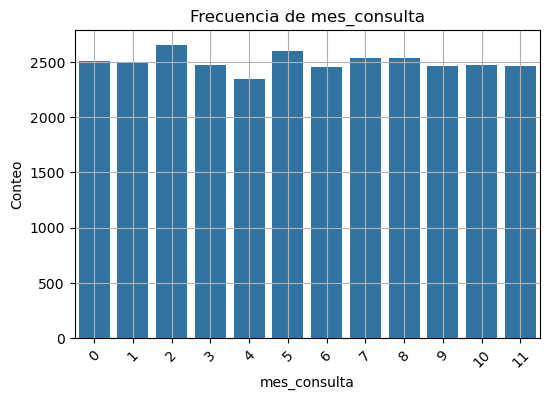

In [21]:
categoricas = ['derivado', 'tipo_consulta', 'urgencia', 'calidad_del_servicio',
               'consulta_resuelta', 'mes_consulta']

for col in categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()